In [1]:
# pip install dgl

In [2]:
import torch
import matplotlib.pyplot as plt
import networkx as nx
import os
import pickle
import time

import warnings
warnings.filterwarnings('ignore')

import dgl
dgl.__version__

'1.0.1'

In [3]:
class CSL(torch.utils.data.Dataset):
    """
    Circular Skip Link Graphs:
    Source: https://github.com/PurdueMINDS/RelationalPooling/
    """

    def __init__(self, path="../datasets/CSL/"):
        self.name = "CSL"
        self.adj_list = pickle.load(
            open(os.path.join(path, "graphs_Kary_Deterministic_Graphs.pkl"), "rb")
        )
        self.graph_labels = torch.load(
            os.path.join(path, "y_Kary_Deterministic_Graphs.pt")
        )
        self.graph_lists = []

        self.n_samples = len(self.graph_labels)
        self.num_node_type = 1  # 41
        self.num_edge_type = 1  # 164
        self._prepare()

    def _prepare(self):
        t0 = time.time()
        print("[I] Preparing Circular Skip Link Graphs v4 ...")
        for sample in self.adj_list:
            _g = dgl.from_scipy(sample)
            g = dgl.remove_self_loop(_g)
            g.ndata["feat"] = torch.zeros(g.number_of_nodes()).long()

            # adding edge features as generic requirement
            g.edata["feat"] = torch.zeros(g.number_of_edges()).long()

            self.graph_lists.append(g)
        self.num_node_type = self.graph_lists[0].ndata["feat"].size(0)
        self.num_edge_type = self.graph_lists[0].edata["feat"].size(0)
        print("[I] Finished preparation after {:.4f}s".format(time.time() - t0))

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return self.graph_lists[idx], self.graph_labels[idx]


In [4]:
print("[I] Loading data (notebook) ...")
dataset = CSL()
print("[I] Finished loading.")

[I] Loading data (notebook) ...
[I] Preparing Circular Skip Link Graphs v4 ...
[I] Finished preparation after 0.2257s
[I] Finished loading.


In [5]:
# preview 5 out of 150 graphs in the collection
dataset.graph_lists[:5]

[Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}),
 Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}),
 Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}),
 Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}),
 Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)})]

In [6]:
# multi-class classification
dataset.graph_labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9])

(Graph(num_nodes=41, num_edges=164,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor(0))


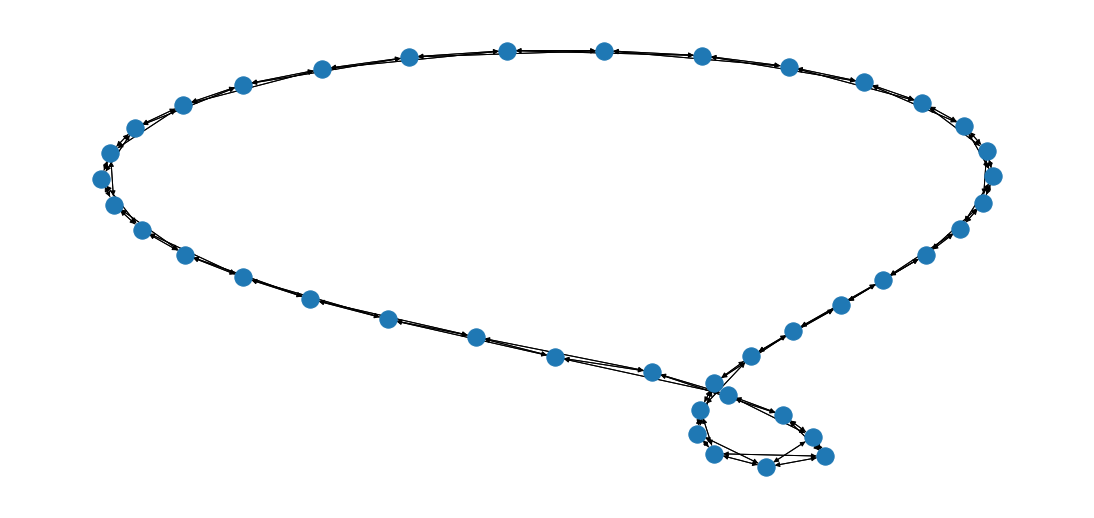

In [7]:
# draw 1 out of 150 graphs in the collection

tf_G = dataset[0]  # tensor graph object
print(tf_G)

# convert tensor to networkx class instance
G = dgl.to_networkx(tf_G[0])
plt.figure(figsize=[15,7])
nx.draw(G)